# Lab-4:
In this lab, we will examine some classifiers, and the regularization concept in the classification problem.
Also, we will see

### Objectives:
1. Lasso and Ridge
2. Naïve Bayes
3. KNN
4. Cross Validation

---
## Lasso and Ridge
Both models are the regularized forms of the linear regression.
Lass with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coefficients/weight, where they must reside in.

### Issues:
1. When to use Lasso?

2. When to use Ridge?

3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?

In [2]:
!pip install pandas
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## Loading Boston dataset
Housing-Prices Values in Suburbs of Boston.

In [9]:
import pandas as pd
import numpy as np
# This dataset is biased, but we will use it for educational purposes
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


## Fitting both Lasso and Ridge

### Task 1:

Fit two models: Lasso and Ridge - with the default alpha-.
Then print their coefficients and notice the difference.

In [10]:
from sklearn.linear_model import Lasso, Ridge

# write code here
lasso = Lasso()
ridge = Ridge()

lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient:", *lasso.coef_, sep='\n\t')
print("Ridge Coefficient:", *ridge.coef_, sep='\n\t')
print('Sum of lasso abs values:', np.sum(np.abs(lasso.coef_)))
print('Sum of ridge abs values:', np.sum(np.abs(ridge.coef_)))

Lasso Coefficient:
	-0.06296576330463614
	0.0350956639719025
	0.0
	0.0
	-0.0
	2.269791338462823
	0.0006779558466116866
	-0.6450657726354462
	0.19354572704933157
	-0.013508702669918599
	-0.6453458726466407
	0.0044904218480321285
	-0.6731506757847043
Ridge Coefficient:
	-0.11105798056135394
	0.03658528048290762
	0.04692128541593161
	0.603824134801354
	-6.974605652267622
	5.118642851602441
	-0.026987022704628997
	-1.2282427950710875
	0.24913980673174269
	-0.013989976538037142
	-0.8478133115629514
	0.006954220877156478
	-0.4688164870854459
Sum of lasso abs values: 4.543637894220047
Sum of ridge abs values: 15.73358080570266


### Task 2:
Let's try different values for alpha for Lasso and Ridge regressors then
plot the validation loss.

<Figure size 640x480 with 0 Axes>

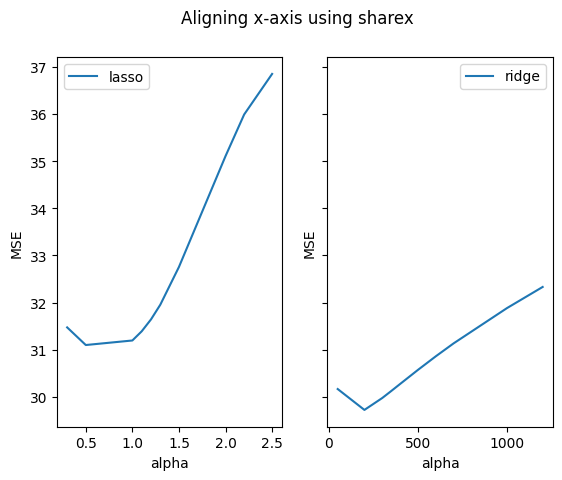

Best value of alpha for lasso: 0.5
Best value of alpha for ridge: 200


In [12]:
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

lasso_alphas = [0.3, 0.5, 1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5]
ridge_alphas = [50, 200, 300, 350, 400, 500, 600, 700, 1000, 1200]
lasso_losses = []
ridge_losses = []
for i in range(len(lasso_alphas)):
    # Create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean squared error loss, then append it to the losses array
    lasso = Lasso(alpha=lasso_alphas[i]).fit(x_train, y_train)

    y_pred = lasso.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_losses.append(mse)

    ridge = Ridge(alpha=ridge_alphas[i]).fit(x_train, y_train)

    y_pred = ridge.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_losses.append(mse)

plt.suptitle('The effect of changing alpha on MSE for lasso and ridge')



# plt.figure(figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Aligning x-axis using sharex')

ax1.plot(lasso_alphas, lasso_losses, label='lasso')
ax1.legend()
ax1.set(xlabel='alpha', ylabel='MSE')

ax2.plot(ridge_alphas, ridge_losses, label='ridge')
ax2.legend()
ax2.set(xlabel='alpha', ylabel='MSE')

plt.show()

lasso_best_alpha = lasso_alphas[np.argmin(lasso_losses)]
ridge_best_alpha = ridge_alphas[np.argmin(ridge_losses)]
print("Best value of alpha for lasso:", lasso_best_alpha)
print("Best value of alpha for ridge:", ridge_best_alpha)

Measuring the loss on the test set with Lasso and ridge regressors with the
best alpha.

In [13]:
lasso = Lasso(lasso_best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Lasso MSE on test set:", mean_squared_error(y_test, y_pred))

ridge = Ridge(ridge_best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge MSE on test set:", mean_squared_error(y_test, y_pred))

Lasso MSE on test set: 31.097541327849463
Ridge MSE on test set: 29.719691133818674


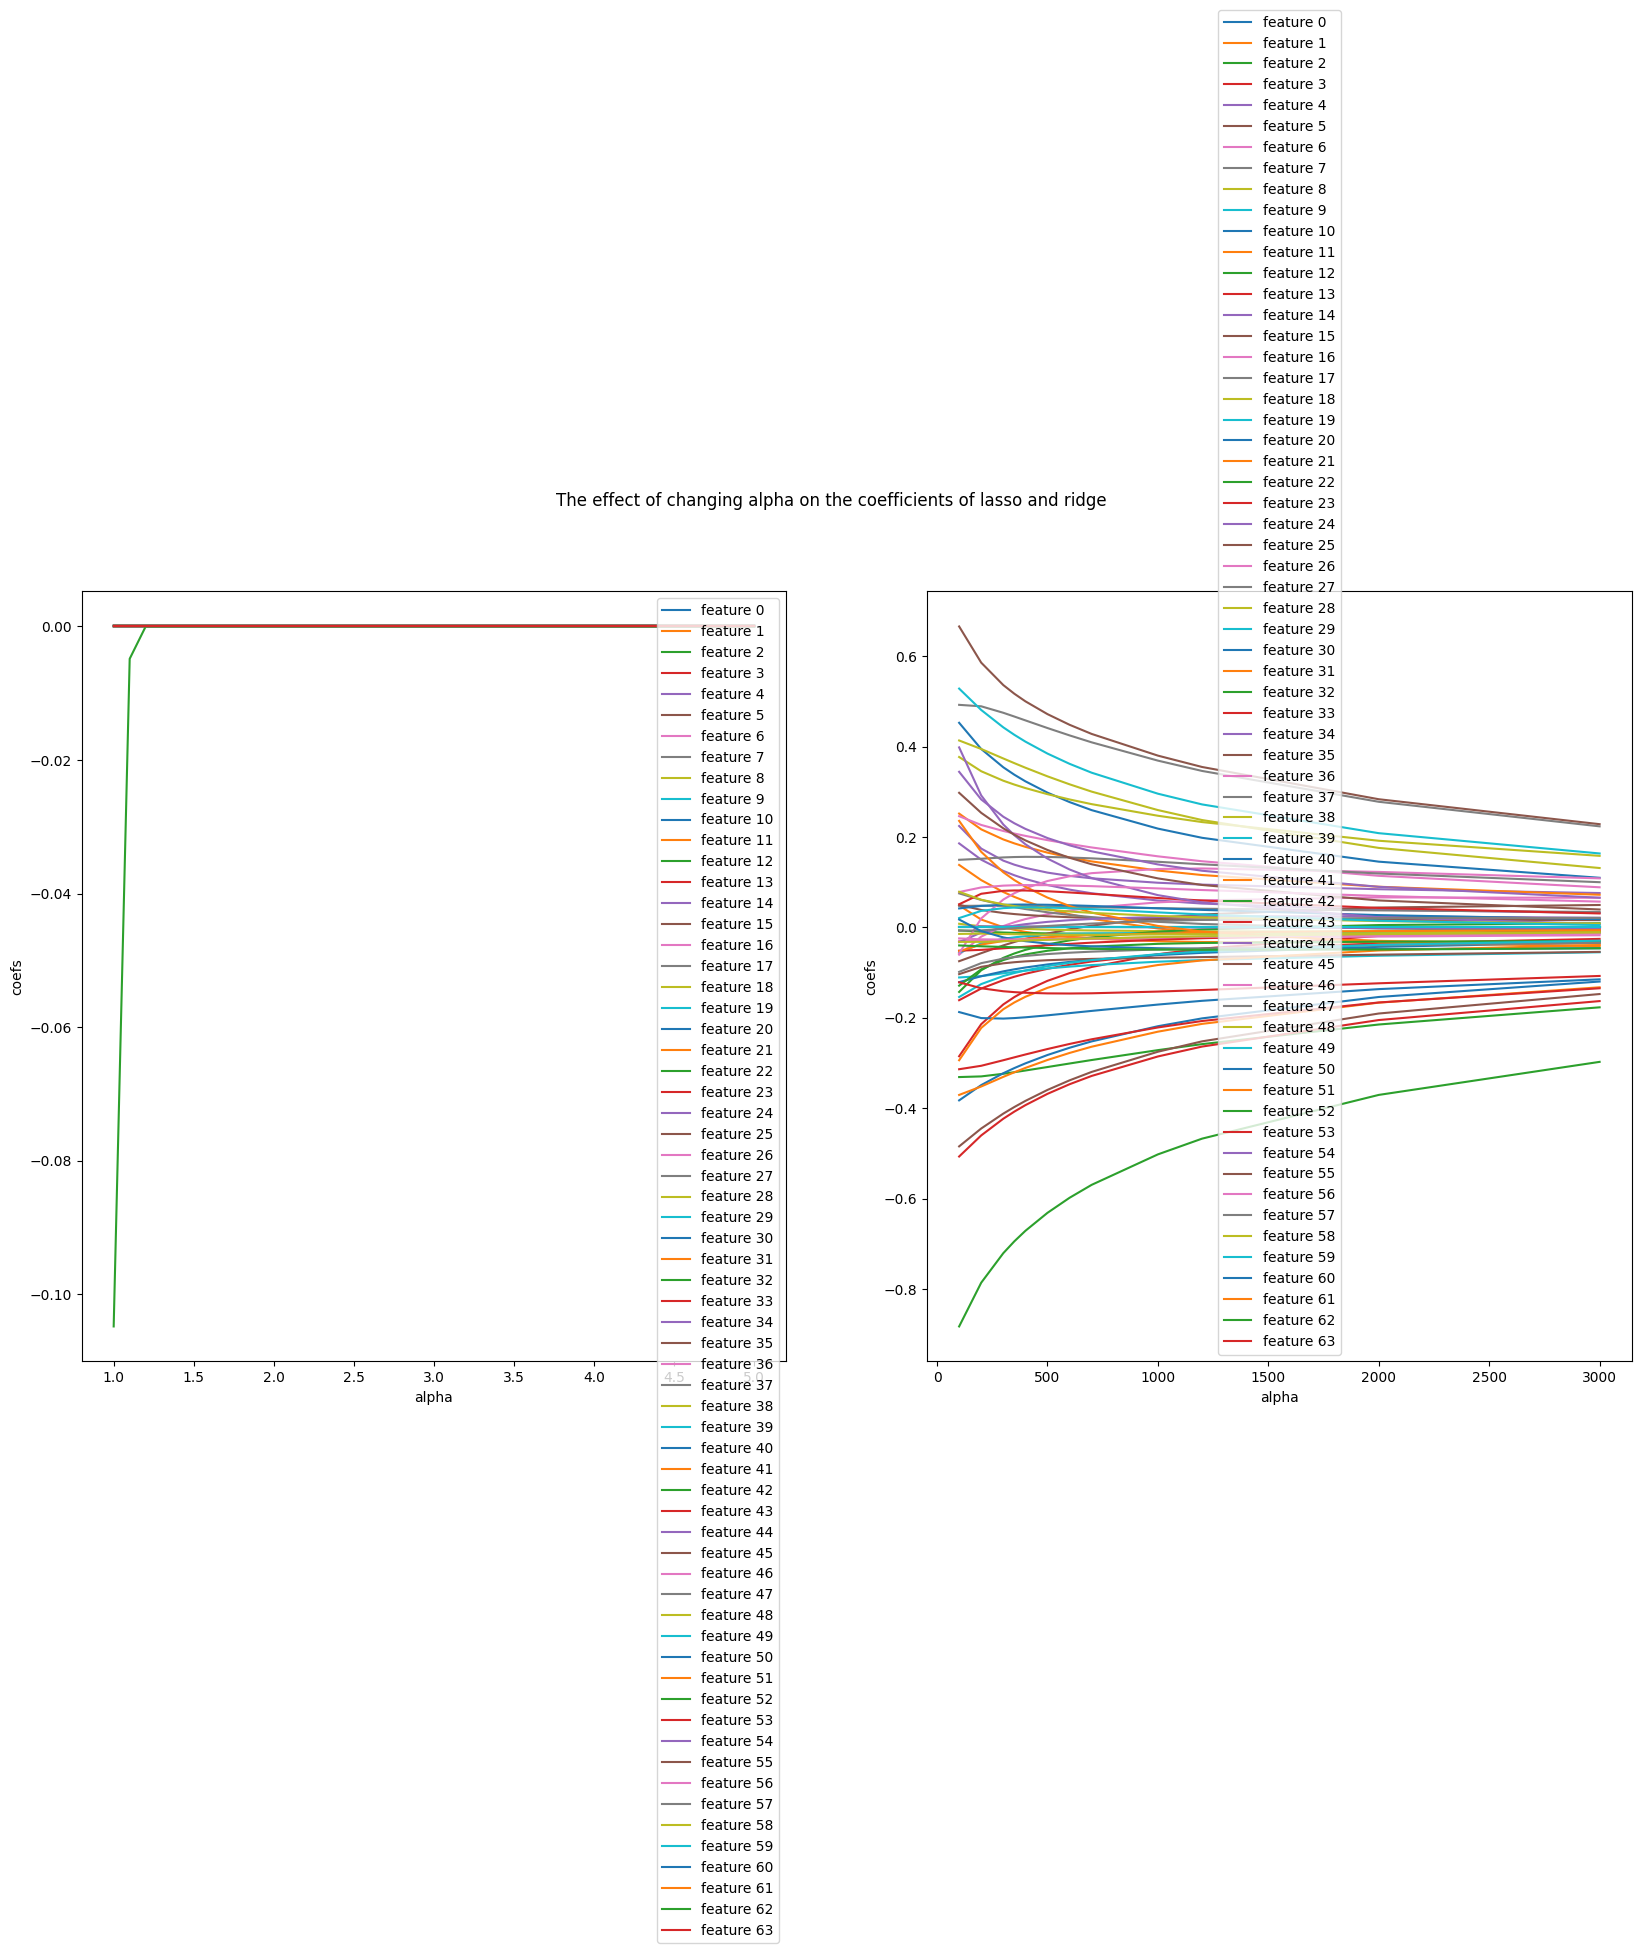

In [31]:
# feature_names =

lasso_alphas = [1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5, 3, 5]
ridge_alphas = [100, 200, 300, 350, 400, 500, 600, 700, 1000, 1200, 2000, 3000]
lasso_coefs_ = np.zeros((len(lasso_alphas), len(X[0])))
ridge_coefs_ = np.zeros((len(ridge_alphas), len(X[0])))
for i in range(len(lasso_alphas)):
    lasso = Lasso(alpha=lasso_alphas[i])
    lasso.fit(x_train, y_train)
    lasso_coefs_[i] = lasso.coef_

for i in range(len(ridge_alphas)):
    ridge = Ridge(alpha=ridge_alphas[i])
    ridge.fit(x_train, y_train)
    ridge_coefs_[i] = ridge.coef_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('The effect of changing alpha on the coefficients of lasso and ridge')

for idx in range(len(X[0])):
    ax1.plot(lasso_alphas, lasso_coefs_[:, idx], label=f'feature {idx}')
ax1.legend()
ax1.set(xlabel='alpha', ylabel='coefs')

for idx in range(len(X[0])):
    ax2.plot(ridge_alphas, ridge_coefs_[:, idx], label=f'feature {idx}')
ax2.legend()
ax2.set(xlabel='alpha', ylabel='coefs')

plt.show()

## Loading the iris dataset
Dataset of 3 types/classes of flowers with 4 features. Suitable for classification!

In [15]:
from sklearn.datasets import load_digits, load_iris

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We will show why we didn't split a validation set.

## Naïve Bayes
We will use the Gaussian Naïve Bayes, that deals -as a assumption- with the continous features as gaussian variables to compute their probability.

$$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}exp(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})$$

While $\mu_y$ and $\sigma_y^2$ are the mean and the variance of the feature $i$ for class $y$.

Note: The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$.

___
What are the pros and cons of Naive bayes classifier?
___

Let's train a naive-bayes model and check the test accuracy.


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8055555555555556


## K nearest neighbour classifier
1. What are the pros and cons of KNN?

___
Let's do the same with KNN classifier.


Rescale the features first.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.        , -0.34341335, -1.11351546, ..., -1.1441921 ,
        -0.49760258, -0.19762214],
       [ 0.        , -0.34341335,  0.14066224, ..., -0.63133993,
        -0.49760258, -0.19762214],
       [ 0.        , -0.34341335,  0.14066224, ..., -0.11848777,
        -0.49760258, -0.19762214],
       ...,
       [ 0.        ,  4.18397181,  1.81289917, ...,  0.73626585,
        -0.49760258, -0.19762214],
       [ 0.        , -0.34341335, -0.69545623, ...,  0.90721657,
         0.97825895, -0.19762214],
       [ 0.        ,  1.92027923,  1.39483994, ..., -0.97324138,
        -0.49760258, -0.19762214]])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9694444444444444


Let's tune the hyperparameter $n\_neighbors$ in the KNN classifier object using the cross-validation.

___
## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

Note: that's why we didn't make a validation set.

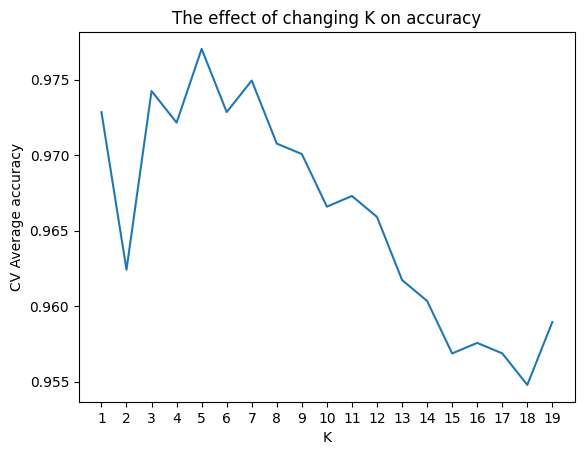

Best K: 5


In [30]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x_train, y_train,
                             cv=7, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

plt.title('The effect of changing K on accuracy')
plt.plot(Ks, cv_scores)
plt.xlabel('K')
plt.xticks(Ks)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', Ks[np.argmax(cv_scores)])

In KNN classifier, there are several hyperparamters to tune, tuning them one
by one is exhaustive approach. Let's try a better approach called GridSearchCV.

### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

### Task 3:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/modules/grid_search.html)
for help.

Then measure the accuracy on the test set.

In [33]:
from sklearn.model_selection import GridSearchCV

# Modify the next lines to run GridSearchCV with cv=7
param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

# create a GridSearch cross validation with cv=7,
# and accuracy as scoring, and specify param_grid


grid_search_clf = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=7
)

# then train on the train dataset
grid_search_clf.fit(x_train, y_train)

means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.973 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.973 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.962 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.973 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.974 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.974 (+/-0.015) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.972 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.977 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.977 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.979 (+/-0.009) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.973 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.980 (+/-0.010) for {'metric': 'euclidean', 'n_neighbors': 

---
When the hyper-parameter(s) range is big, grid-search becomes exponentially inefficient.
What other approaches can we use to solve this problem?

## Further reading

[L1 vs L2](https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning),
What if we used something other than the norm? like $\Sigma \ln(w_j^2)$

[Elastic net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

[Huber regularization](http://www.stephanmandt.com/papers/ECML_2016.pdf),
what if we switch the condition?

[Pruned Cross Validation](https://piotrekga.github.io/Pruned-Cross-Validation/)